#Employee Attrition Prediction

###This project aims to develop a predictive model to identify the likelihood of employee attrition within a company using HR data. By leveraging advanced classification techniques and feature engineering specific to HR analytics, the model predicts whether an employee is likely to leave the organization.

##Loading and Exploring the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
print("Missing Values:")
print(df.isnull().sum())

print("\nDataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nAttrition Distribution:")
print(df['Attrition'].value_counts(normalize=True))

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

##Data Preprocessing
###The following steps are taken to preprocess the data:
- Handling missing values
- Encoding categorical variables
- Splitting the data into training and testing sets

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
X = df.drop(columns=['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])
y = df['Attrition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

##Model Building

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("\nBaseline Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Baseline Model Performance:
Accuracy: 0.8390022675736961
Confusion Matrix:
 [[361   9]
 [ 62   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



##Model Training and Evaluation
###We start with a baseline RandomForestClassifier model, followed by hyperparameter tuning using RandomizedSearchCV to optimize the model. Finally, we train a balanced model to handle class imbalance and evaluate its performance.

In [6]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.sample(frac=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_features': ['sqrt'],
    'max_depth': [6, 8],
    'criterion': ['gini']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=1, verbose=2, random_state=42)
random_search.fit(X_train_sample, y_train_sample)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_optimized = best_model.predict(X_test)
print("\nOptimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

c:\users\khush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=150; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=150; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=150; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150; total time=   0.0s


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=8, criterion='gini', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred_balanced = model.predict(X_test)

print("\nBalanced Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Model Performance:
Accuracy: 0.8321995464852607
Confusion Matrix:
 [[357  13]
 [ 61  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.91       370
           1       0.43      0.14      0.21        71

    accuracy                           0.83       441
   macro avg       0.64      0.55      0.56       441
weighted avg       0.79      0.83      0.79       441



##Feature Importance
###Visualizing the importance of features in predicting employee attrition.

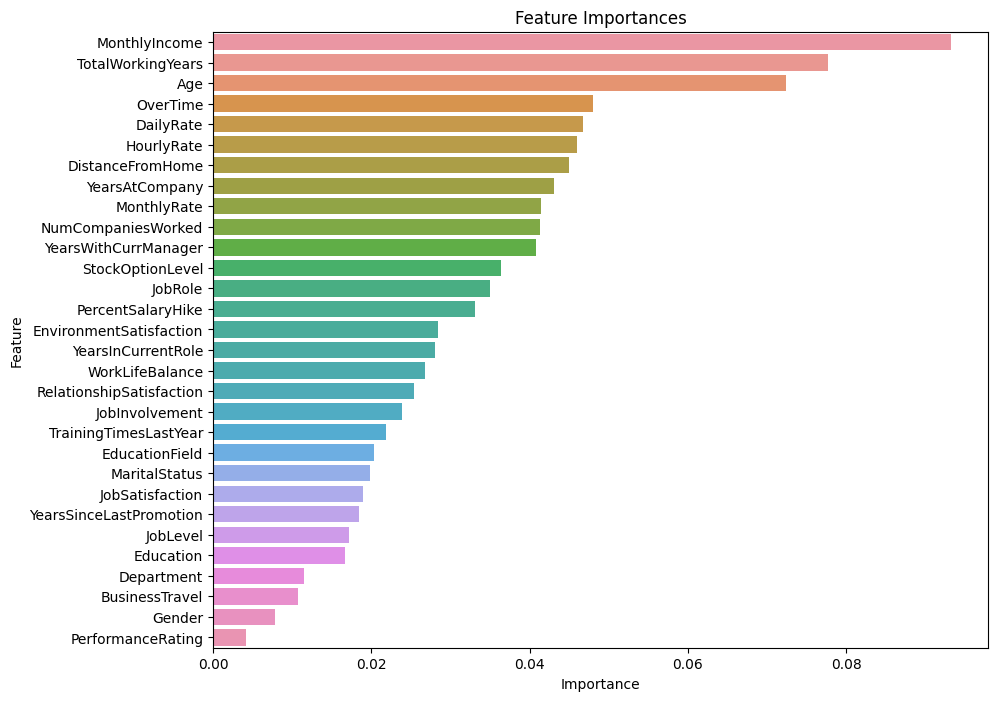

In [8]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Saving the Model
###The optimized model is saved using Joblib for future use.

In [9]:
import joblib
joblib.dump(best_model, 'employee_attrition_model.pkl')

['employee_attrition_model.pkl']

##Loading the Model

In [11]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

loaded_model = joblib.load('employee_attrition_model.pkl')

y_pred_loaded_model = loaded_model.predict(X_test)

print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded_model))
print("Loaded Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded_model))
print("Loaded Model Classification Report:\n", classification_report(y_test, y_pred_loaded_model))

Loaded Model Accuracy: 0.8299319727891157
Loaded Model Confusion Matrix:
 [[359  11]
 [ 64   7]]
Loaded Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.39      0.10      0.16        71

    accuracy                           0.83       441
   macro avg       0.62      0.53      0.53       441
weighted avg       0.77      0.83      0.78       441

